In [187]:
# import the data from training file
import os
import pandas as pd
train_data = pd.read_csv("train.csv") 
# read from csv, as we can see headers are already included
print(train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [188]:
# now that we set up some stuff, lets analyze the data
train_data.dtypes 
# any datatype that is an object requires feature engineering for training

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [189]:
# lets sort passengers by age
ages_increasing = train_data.sort_values(["Age"], ascending = True)
print("          sorted passengers by age")
print(ages_increasing)
print("")

# get the youngest age
min_age = train_data["Age"].min()
print("age of youngest passenger: " + str(min_age))
# getting the name of the youngest passenger
print("name of youngest passenger: " + str(train_data["Name"][train_data["Age"] == min_age].values[0]))

          sorted passengers by age
     PassengerId  Survived  Pclass  \
803          804         1       3   
755          756         1       2   
644          645         1       3   
469          470         1       3   
78            79         1       2   
831          832         1       2   
305          306         1       1   
827          828         1       2   
381          382         1       3   
164          165         0       3   
183          184         1       2   
386          387         0       3   
172          173         1       3   
788          789         1       3   
642          643         0       3   
7              8         0       3   
530          531         1       2   
297          298         0       1   
824          825         0       3   
205          206         0       3   
119          120         0       3   
340          341         1       2   
479          480         1       3   
16            17         0       3   
348          34

In [190]:
# lets go ahead and grab some data for age
age_list = train_data["Age"].values
cnt = 0
for age in age_list:
    print(age, end=", ") # cat line
print() # new line

22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, nan, nan, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, nan, nan, 0.83, 30.0, 22.0, 29.0, nan, 28.0, 17.0, 33.0, 16.0, nan, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, nan, 71.0, 23.0, 34.0, 34.0, 28.0, nan, 21.0, 33.0, 37.0, 28.0, 21.0, nan, 38.0, nan, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 70.5, 29.0, 24.0, 2.0, 21.0, nan, 32.5, 32.5, 54.0, 12.0, nan, 24.0, nan, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, nan, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, nan, 51.0, 16.0, 30.0, nan, nan, 44.0, 40.0, 26.0, 17.0, 1.0, 9.0, nan, 45.0, nan, 28.0, 61.0, 4.0, 1.0, 21.0, 56.0

In [191]:
# set up matplotlib for data visualization, the %matplotlib inline tells notebook to display
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("classic") #use the classic style for pyploy

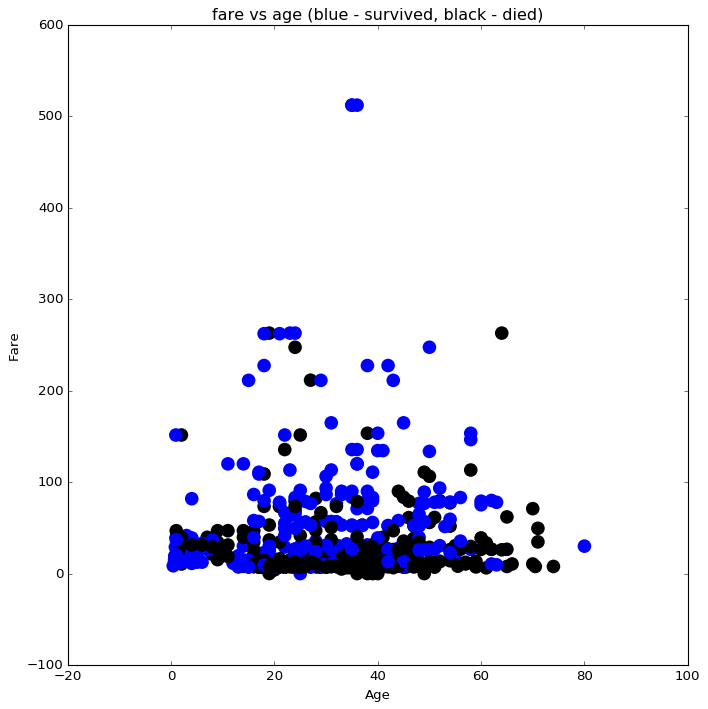

In [192]:
# 2d data visualization - scatter plot of age vs fare
colors = [];
age_list = train_data["Age"].values         # use as feature
fare_list = train_data["Fare"].values       # use as feature
for idx in train_data["Survived"].values:
    if train_data["Survived"].values[idx] == 1:
        colors.append("blue")
    else:
        colors.append("black")

x = age_list
y = fare_list
# set up figure to make sure things look right
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x, y, s = 150, c = colors, alpha = 1, lw = 0)
plt.title("fare vs age (blue - survived, black - died)")
plt.ylabel("Fare")
plt.xlabel("Age")
plt.show()
# its not possible to use k nearest neighbors for this kind of data, so a CART model would be more appropriate

In [193]:
# we can feature engineer something called family size from parch (parent + child) and sibsp (sibling + spouse)

sibsp_list  = train_data["SibSp"].values   # use as feature
parch_list  = train_data["Parch"].values   # use as feature
pclass_list = train_data["Pclass"].values  # use as feature
train_data["Family_Size"] = train_data["SibSp"] + train_data["Parch"]
family_size_list = train_data["Family_Size"].values # use as feature
print(family_size_list)
# as we can see most families have a size of 1

[ 1  1  0  1  0  0  0  4  2  1  2  0  0  6  0  0  5  0  1  0  0  0  0  0
  4  6  0  5  0  0  0  1  0  0  1  1  0  0  2  1  1  1  0  3  0  0  1  0
  2  1  5  0  1  1  1  0  0  0  3  7  0  0  1  5  0  2  0  0  6  2  0  7
  0  1  0  0  0  0  2  0  0  0  0  0  0  3  4  0  5  0  0  0  1  3  0  0
  0  1  1  1  0  0  1  0  2  0  0  0  0  1  0  1  0  1  0  0  0  1  1  6
  2  0  1  0  1  1  0  0  2  0  0  0  1  1  0  0  2  1  0  0  2  0  1  0
  0  2  0  4  2  0  0  1  0  2  0  1  0  0  0 10  1  0  0  0  5  2  1  5
  0  0  0  5  2  0  0  2  4  0  0  0 10  0  6  3  2  0  1  0  2  0  0  0
  1  2  0  0  0  1  0  0  0 10  0  0  0  1  1  0  0  0  0  0  0  0  1  1
  0  1  0  0  0  0  0  0  1  0  0  0  0  4  1  0  0  6  0  0  1  2  0  0
  1  1  0  0  0  2  0  2  2  1  0  2  0  1  2  2  0  0  0  1  0  6  2  0
  0  0  5  1  1  0  0  0  1  1  0  1  0  0  5  2  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  3  0  1  0  2  0  0  0  3  0  1  1  0  0  4
  2  0  2  0  1  0  2  2  0  0  0  2 10  0  0  0  2

In [194]:
# to make proper use of the names column in our data, we need to extract some common features
# the features that we can extract from the information is primarily in the form of a title (mr, miss, mrs)
# we can treat titles as if they are names since names are not a very good feature
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']
sex_list = train_data["Sex"].values # use this as feature
name_list = [] # use this as feature
for idx in range(0, len(train_data["Name"].values)) :
    for title in title_list :
        if title in train_data["Name"].values[idx] :
            name_list.append(title)
            break

print(name_list)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

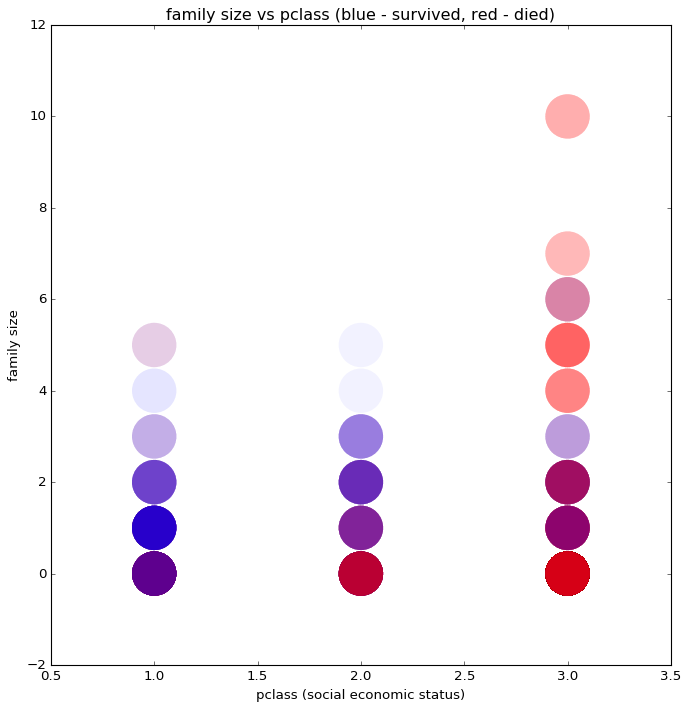

In [195]:
# 2d visualization of family size and class

colors = []
for outcome in train_data["Survived"].values:
    if outcome == 1:
        colors.append("blue")
    else:
        colors.append("red")

fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(pclass_list, family_size_list, s = 1600, c = colors, alpha = 0.05, lw = 0)
plt.title("family size vs pclass (blue - survived, red - died)")
plt.ylabel("family size")
plt.xlabel("pclass (social economic status)")
plt.show()
# as we can see here pclass and family size are very good features to consider for classification

In [196]:
# process the title_list
titles_to_digits = {'Mrs':0, 'Mr':1, 'Master':2, 'Miss':3, 'Major':4, 'Rev':5,
                    'Dr':6, 'Ms':7, 'Mlle':8, 'Col':9, 'Capt':10, 'Mme':11, 'Countess':12,
                    'Don':13, 'Jonkheer':14}
title_list = [] # feature
for title in name_list:
    title_list.append(titles_to_digits[title])
print(title_list)

[1, 0, 3, 0, 1, 1, 1, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 1, 0, 0, 1, 1, 3, 1, 3, 0, 1, 1, 3, 1, 13, 0, 3, 1, 1, 1, 1, 1, 3, 3, 0, 0, 1, 3, 3, 1, 1, 3, 1, 0, 2, 1, 0, 0, 1, 1, 3, 1, 3, 2, 1, 3, 1, 2, 1, 2, 0, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 3, 1, 5, 5, 0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3, 1, 0, 1, 1, 1, 0, 1, 3, 2, 0, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 6, 3, 0, 1, 5, 1, 0, 1, 1, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 0, 1, 3, 3, 3, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 1, 3, 1, 1, 1, 3, 1, 0, 3, 1, 1, 3, 1, 2, 3, 0, 1, 3, 3, 3, 0, 1, 1, 3, 0, 6, 3, 0, 1, 1, 3, 0, 1, 3, 1, 0, 0, 3, 3, 1, 1,

In [197]:
import math
# process age data
for i in range(0, len(age_list)):
    if math.isnan(age_list[i]) == True:
        age_list[i] = 100
print(age_list)

[ 22.    38.    26.    35.    35.   100.    54.     2.    27.    14.
   4.    58.    20.    39.    14.    55.     2.   100.    31.   100.
  35.    34.    15.    28.     8.    38.   100.    19.   100.   100.
  40.   100.   100.    66.    28.    42.   100.    21.    18.    14.
  40.    27.   100.     3.    19.   100.   100.   100.   100.    18.
   7.    21.    49.    29.    65.   100.    21.    28.5    5.    11.
  22.    38.    45.     4.   100.   100.    29.    19.    17.    26.
  32.    16.    21.    26.    32.    25.   100.   100.     0.83  30.
  22.    29.   100.    28.    17.    33.    16.   100.    23.    24.
  29.    20.    46.    26.    59.   100.    71.    23.    34.    34.
  28.   100.    21.    33.    37.    28.    21.   100.    38.   100.
  47.    14.5   22.    20.    17.    21.    70.5   29.    24.     2.
  21.   100.    32.5   32.5   54.    12.   100.    24.   100.    45.
  33.    20.    47.    29.    25.    23.    19.    37.    16.    24.
 100.    22.    24.    19.    18. 

In [198]:
# lets do some actual training
from sklearn.ensemble import RandomForestClassifier
import numpy as np
# make sure to import pandas for data frame
np.random.seed(0)

# lets grab all the features
features = ["family_size", "pclass", "title", "sibsp", "parch", "age", "fare"]
# lets create our own train dataframe from out processed lists (non-raw)
train_df = pd.DataFrame( 
                        data={"family_size":family_size_list, "pclass":pclass_list,
                              "title":title_list, "sibsp":sibsp_list,
                              "parch":parch_list, "age":age_list, "fare":fare_list
                             }
                       )

# create classifier
clf = RandomForestClassifier(n_estimators=10, n_jobs=2, criterion="gini", 
                            max_features= 6, # take sqrt(of all possible features)
                             max_depth=20, min_samples_split= 2, min_samples_leaf= 1,
                            bootstrap=True)
# fit model and also grab survived_list
survived_list = train_data["Survived"].values
clf.fit(train_df[features], survived_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
# yay! lets do our predictions
test_data = pd.read_csv("test.csv")
test_data["Family_Size"] = test_data["SibSp"] + test_data["Parch"]

# turn test titles into arr

name_list = [] # use this as feature
for name in test_data["Name"].values :
    for title in ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']:
        if title in name:
            name_list.append(title)
            break

test_titles = []
for title in name_list:
    test_titles.append(titles_to_digits[title])

processed_age = []
for age in test_data["Age"].values:
    if math.isnan(age) == True:
        processed_age.append(100)
    else:
        processed_age.append(age)
    
print(test_data["Fare"])    
# something is wrong with fare
fare_list = []
for fare in test_data["Fare"].values:
    if math.isnan(fare):
        fare_list.append(5)
    else:
        fare_list.append(fare)

test_df = pd.DataFrame( 
                        data={"family_size":test_data["Family_Size"].values, "pclass":test_data["Pclass"].values,
                              "title":test_titles, "sibsp":test_data["SibSp"].values,
                              "parch":test_data["Parch"].values, "age":processed_age, "fare":fare_list
                             }
                       )
predictions = clf.predict(test_df[features])
print(predictions)

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [200]:
print(len(test_data["PassengerId"].values))
print(len(predictions))
predictions_df = pd.DataFrame(
                                data={
                                    "PassengerId":test_data["PassengerId"].values,
                                    "Survived":predictions
                                }
                             )
print(predictions_df)
predictions_df.to_csv("sub.csv", encoding='utf-8', index=False)

418
418
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         1
19           911         0
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         1
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284    